# Analysis of 2018 fake news urls and comparison with 2016, 2017 fake news sites

In [14]:
import pandas as pd
from datetime import datetime
from urllib.parse import urlparse
import calendar
import re

In [15]:
%matplotlib inline
pd.set_option('max_colwidth', 200)

## Load the lists of sites by year

In [16]:
sites_2018 = pd.read_csv("../data/sites_2018.csv")
sites_2017 = pd.read_csv("../data/sites_2017.csv")
sites_2016 = pd.read_csv("../data/sites_2016.csv")

sites_2018.head()

,domain
0,12minutos.com
1,20minutenews.com
2,24aktuelles.com
3,24x365live.com
4,8shit.net


In [17]:
len(sites_2018)

129

Check for duplicates

In [18]:
assert sites_2018["domain"].value_counts().max() == 1
assert sites_2017["domain"].value_counts().max() == 1
assert sites_2016["domain"].value_counts().max() == 1

**Sites in the 2018 list that are not in the 2017 list**

In [19]:
difference = len(
    set(sites_2018["domain"]) - set(sites_2017["domain"])
)

difference

43

By percent

In [20]:
total = len(sites_2018)

round(difference / total, 4)

0.3333

**Sites in the 2018 list that are not in the 2016 list**

In [21]:
difference = len(
    set(sites_2018["domain"]) - set(sites_2016["domain"])
)

difference

100

By percentage

In [22]:
round(difference / total, 4)

0.7752

**Sites that survived from 2016 to 2018**

In [23]:
sites_2016_to_2018 = set(sites_2018["domain"]).intersection(set(sites_2016["domain"]))

for site in sorted(sites_2016_to_2018):
    print(site)

abcnews.com.co
adobochronicles.com
bizstandardnews.com
burrardstreetjournal.com
celebtricity.com
civictribune.com
dailycurrant.com
dailyfinesser.com
empireherald.com
empirenews.net
empiresports.co
huzlers.com
krbcnews.com
nationalreport.net
news4ktla.com
newsexaminer.net
newslo.com
notallowedto.com
now8news.com
react365.com
realnewsrightnow.com
straightstoned.com
stuppid.com
thenewsnerd.com
theracketreport.com
thevalleyreport.com
tmzhiphop.com
witscience.org
worldnewsdailyreport.com


In [24]:
len(sites_2016_to_2018)

29

**Sites that survived from 2017 to 2018**

In [25]:
sites_2017_to_2018 = set(sites_2018["domain"]).\
    intersection(set(sites_2017["domain"]))

for site in sorted(sites_2017_to_2018):
    print(site)

12minutos.com
20minutenews.com
24aktuelles.com
24x365live.com
abcnews-us.com
abcnews.com.co
actualite.co
adobochronicles.com
albertatimes.com
alertchild.com
areyousleep.com
badcriminals.com
bizstandardnews.com
breakingnews247.net
breakingnews365.net
burrardstreetjournal.com
cartelreport.com
celebtricity.com
channel22news.com
channel23news.com
channel24news.com
channel28news.com
channel33news.com
channel34news.com
channel40news.com
channel45news.com
channel46news.com
channel60news.com
civictribune.com
cnn.com.de
cnoticias.net
dailycurrant.com
dailyfinesser.com
dailyworldupdate.com
drugsofficial.com
empireherald.com
empirenews.net
empiresports.co
en-bref.fr
folksvideo.com
freewoodpost.com
huzlers.com
ladiesofliberty.net
mrnewswatch.com
nachrichten.de.com
nachrichten365.com
nationalreport.net
neonnettle.com
net-infosnews.com
news4ktla.com
newsexaminer.net
newslo.com
newspunch.com
notallowedto.com
noticias-frescas.com
notizzia.com
now8news.com
politicot.com
react365.com
realnewsrightnow.co

In [26]:
len(sites_2017_to_2018)

86

# Facebook engagement

**Top stories**

In [27]:
# load 2018 list and parse dates
top_2018 = pd.read_csv(
    "../data/top_2018.csv",
    thousands = ',',
    dtype = {"fb_engagement": int},
    parse_dates = ['published_date'])\
    .dropna(axis = "index", subset = ['url']) \
    .sort_values('fb_engagement', ascending = False)[0:50]

top_2018.head(10)[['title', 'fb_engagement']]

,title,fb_engagement
0,"Lottery winner arrested for dumping $200,000 of manure on ex-boss’ lawn",2383021
1,Former first lady Barbara Bush dies at 92 - CNN,2290000
2,Woman sues Samsung for $1.8M after cell phone gets stuck inside her vagina,1304430
3,BREAKING: Michael Jordan Resigns From The Board At Nike-Takes 'Air Jordans' With Him,911336
4,Donald Trump Ends School Shootings By Banning Schools,830116
5,Florida Man Arrested For Tranquilizing And Raping Alligators In Everglades,824137
6,Two altar boys were arrested for putting weed in the censer-burner,797628
7,North Korea Agrees To Open Its Doors To Christianity,760314
8,Man Eats Girlfriends Booty For The First Time Dies From E. Coli,633642
9,Muslim Figure: “We Must Have Pork-Free Menus Or We Will Leave U.S.” How Would You Respond This?,631589


Total engagement

In [28]:
top_2018['fb_engagement'].sum()

22000044

Top domains in 2018

In [15]:
# pull the domain out of the url
top_2018['domain'] = top_2018['url'].apply( 
    lambda each: re.sub(r"^www\.", "", urlparse(each).netloc)
)

# group and count
top_2018['domain'].value_counts()\
    .to_frame("count")\
    .loc[lambda frame: frame['count'] > 1]

,count
huzlers.com,9
worldnewsdailyreport.com,9
yournewswire.com,8
thereisnews.com,5
wittheshit.com,2
react365.com,2
8shit.net,2


## What types of stories did well in 2018?

In [16]:
# Note: Counts nulls as "Other"
top_cats_2018 = top_2018['category']\
    .fillna("Other")\
    .value_counts()\
    .to_frame("count")

top_cats_2018

,count
Crime,21
Politics,10
Other,10
Medical,6
Business,1
Sports,1
Music,1


Categories by proportion of whole

In [17]:
top_2018['category']\
    .fillna("Other")\
    .value_counts(normalize = True)\
    .to_frame("proportion")

,proportion
Crime,0.42
Politics,0.20
Other,0.20
Medical,0.12
Business,0.02
Sports,0.02
Music,0.02


# Posts over time

In [18]:
# re-index by date
top_2018.index = top_2018['published_date']

# group by month and convert integer to named month
top_2018_bymonth = top_2018.groupby(pd.Grouper(freq='M')) \
    .count()

top_2018_bymonth.index = top_2018_bymonth.index.map(
    lambda each: calendar.month_name[each.month]
)

top_2018_bymonth['title'].to_frame('count')

,count
published_date,
January,3
February,5
March,3
April,6
May,6
June,4
July,7
August,2
September,8


Charted

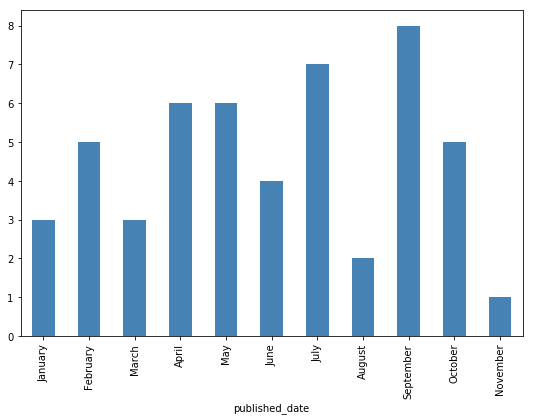

In [19]:
top_2018_bymonth['title'].plot(
    kind = "bar",
    color = "steelblue",
    figsize = (9, 6),
);

---

---

---